<a href="https://colab.research.google.com/github/jefmud/mw_image_pipeline1/blob/master/Tensites_Full_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

edf = pd.read_csv('http://muday.net/datasets/tensites/empty_output.csv')
edf.head()

,Unnamed: 0,id,label,prediction_top,confidence_top,predictions_all
0,0,TOG_2#EK000434,empty,species,0.9959,"{'empty': '0.0041', 'species': '0.9959'}"
1,1,TOG_2#EK001365,empty,species,0.7692,"{'empty': '0.2308', 'species': '0.7692'}"
2,2,TOG_2#EK000780,empty,species,0.9766,"{'empty': '0.0234', 'species': '0.9766'}"
3,3,TOG_2#EK000809,empty,empty,0.7004,"{'empty': '0.7004', 'species': '0.2996'}"
4,4,TOG_2#EK000807,empty,species,0.6418,"{'empty': '0.3582', 'species': '0.6418'}"


In [38]:
# read the observations data frame
odf = pd.read_csv('http://muday.net/datasets/tensites/observations.csv')

# get rid of Unnamed column
del odf['Unnamed: 0']

# create an "empty/species" column called "occupied"
# this will allow us to match up to the MWe model predictions
odf['occupied_hi'] = odf.name.apply(lambda x : 'empty' if x=='NOTHING' else 'species')

# rename the "name" column to "species_hi" (species, human id)
odf = odf.rename(columns={'name':'species_hi'})

odf.head()

,id,image_id,species_id,count,base_url,pathname,url,species_hi,occupied_hi
0,1,1,49,0,http://media.itg.wfu.edu/sites/,TAW_2/EK001529.JPG,http://media.itg.wfu.edu/sites/TAW_2/EK001529.JPG,NOTHING,empty
1,2,2,49,0,http://media.itg.wfu.edu/sites/,TAW_2/EK000665.JPG,http://media.itg.wfu.edu/sites/TAW_2/EK000665.JPG,NOTHING,empty
2,3,3,49,0,http://media.itg.wfu.edu/sites/,TAW_2/EK000213.JPG,http://media.itg.wfu.edu/sites/TAW_2/EK000213.JPG,NOTHING,empty
3,4,4,49,0,http://media.itg.wfu.edu/sites/,TAW_2/EK001473.JPG,http://media.itg.wfu.edu/sites/TAW_2/EK001473.JPG,NOTHING,empty
4,5,5,49,0,http://media.itg.wfu.edu/sites/,TAW_2/EK000152.JPG,http://media.itg.wfu.edu/sites/TAW_2/EK000152.JPG,NOTHING,empty


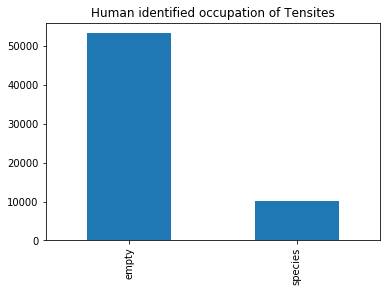

In [41]:
# show ratio of species to occupied in observations
odf.occupied_hi.value_counts().plot.bar(title="Human identified occupation of Tensites")

In [43]:
# show empty, species counts
total_ids = odf.occupied_hi.count()
total_empty = odf[odf.occupied_hi=='empty'].occupied_hi.count()
ratio = float(total_empty)/total_ids
print("Total identifications ==> ", total_ids)
print("Empty identifications ==> ", total_empty)
print("Empty percentage {}/{} ==> {}".format(total_empty, total_ids, ratio))
print("Species percentage ==>", 1-ratio)

Total identifications ==>  63384
Empty identifications ==>  53231
Empty percentage 53231/63384 ==> 0.8398176195885397
Species percentage ==> 0.16018238041146027


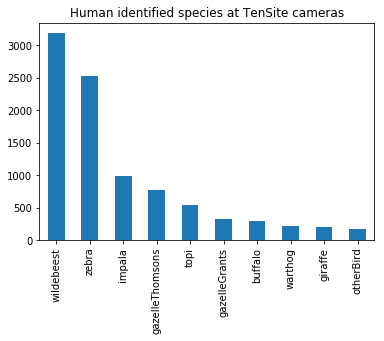

In [47]:
# show species distribution
species_only = odf[odf.occupied_hi=='species']
species_only.species_hi.value_counts()[:10].plot.bar(title='Human identified species at TenSite cameras')

In [45]:
# get the MWe and MWs combined data
mwdf= pd.read_csv('http://muday.net/datasets/tensites/tensites_output.csv')
del mwdf['Unnamed: 0']
mwdf.head()

,capture_id,label,prediction_top,confidence_top,predictions_all,occupied,confidence_occupied,url,site
0,TOG_2#EK000434,species,gazellethomsons,0.9656,"{'aardvark': '0.0000', 'aardwolf': '0.0001', '...",species,0.9959,http://media.itg.wfu.edu/sites/TOG_2/EK000434.JPG,TOG
1,TOG_2#EK001365,species,giraffe,0.1258,"{'aardvark': '0.0004', 'aardwolf': '0.0005', '...",species,0.7692,http://media.itg.wfu.edu/sites/TOG_2/EK001365.JPG,TOG
2,TOG_2#EK000780,species,gazellethomsons,0.2123,"{'aardvark': '0.0007', 'aardwolf': '0.0005', '...",species,0.9766,http://media.itg.wfu.edu/sites/TOG_2/EK000780.JPG,TOG
3,TOG_2#EK000809,species,impala,0.2378,"{'aardvark': '0.0006', 'aardwolf': '0.0010', '...",empty,0.7004,http://media.itg.wfu.edu/sites/TOG_2/EK000809.JPG,TOG
4,TOG_2#EK000807,species,impala,0.4424,"{'aardvark': '0.0002', 'aardwolf': '0.0003', '...",species,0.6418,http://media.itg.wfu.edu/sites/TOG_2/EK000807.JPG,TOG


In [46]:
# merge the datasets
mdf = pd.merge(mwdf, odf, on="url", how="inner")
mdf.head()

,capture_id,label,prediction_top,confidence_top,predictions_all,occupied,confidence_occupied,url,site,id,image_id,species_id,count,base_url,pathname,species_hi,occupied_hi
0,TOG_2#EK000434,species,gazellethomsons,0.9656,"{'aardvark': '0.0000', 'aardwolf': '0.0001', '...",species,0.9959,http://media.itg.wfu.edu/sites/TOG_2/EK000434.JPG,TOG,17912,2712,25,2,http://media.itg.wfu.edu/sites/,TOG_2/EK000434.JPG,impala,species
1,TOG_2#EK001365,species,giraffe,0.1258,"{'aardvark': '0.0004', 'aardwolf': '0.0005', '...",species,0.7692,http://media.itg.wfu.edu/sites/TOG_2/EK001365.JPG,TOG,15435,2408,49,0,http://media.itg.wfu.edu/sites/,TOG_2/EK001365.JPG,NOTHING,empty
2,TOG_2#EK000780,species,gazellethomsons,0.2123,"{'aardvark': '0.0007', 'aardwolf': '0.0005', '...",species,0.9766,http://media.itg.wfu.edu/sites/TOG_2/EK000780.JPG,TOG,19240,3019,11,2,http://media.itg.wfu.edu/sites/,TOG_2/EK000780.JPG,eland,species
3,TOG_2#EK000809,species,impala,0.2378,"{'aardvark': '0.0006', 'aardwolf': '0.0010', '...",empty,0.7004,http://media.itg.wfu.edu/sites/TOG_2/EK000809.JPG,TOG,8094,1758,49,0,http://media.itg.wfu.edu/sites/,TOG_2/EK000809.JPG,NOTHING,empty
4,TOG_2#EK000807,species,impala,0.4424,"{'aardvark': '0.0002', 'aardwolf': '0.0003', '...",species,0.6418,http://media.itg.wfu.edu/sites/TOG_2/EK000807.JPG,TOG,10154,1893,49,0,http://media.itg.wfu.edu/sites/,TOG_2/EK000807.JPG,NOTHING,empty


In [49]:
# MWe/MWs "occupied" column matches with Human identified "occupied_hi" column
matched_data = mdf[mdf.occupied==mdf.occupied_hi]
matched_data.head()

,capture_id,label,prediction_top,confidence_top,predictions_all,occupied,confidence_occupied,url,site,id,image_id,species_id,count,base_url,pathname,species_hi,occupied_hi
0,TOG_2#EK000434,species,gazellethomsons,0.9656,"{'aardvark': '0.0000', 'aardwolf': '0.0001', '...",species,0.9959,http://media.itg.wfu.edu/sites/TOG_2/EK000434.JPG,TOG,17912,2712,25,2,http://media.itg.wfu.edu/sites/,TOG_2/EK000434.JPG,impala,species
2,TOG_2#EK000780,species,gazellethomsons,0.2123,"{'aardvark': '0.0007', 'aardwolf': '0.0005', '...",species,0.9766,http://media.itg.wfu.edu/sites/TOG_2/EK000780.JPG,TOG,19240,3019,11,2,http://media.itg.wfu.edu/sites/,TOG_2/EK000780.JPG,eland,species
3,TOG_2#EK000809,species,impala,0.2378,"{'aardvark': '0.0006', 'aardwolf': '0.0010', '...",empty,0.7004,http://media.itg.wfu.edu/sites/TOG_2/EK000809.JPG,TOG,8094,1758,49,0,http://media.itg.wfu.edu/sites/,TOG_2/EK000809.JPG,NOTHING,empty
10,TOG_2#EK000632,species,gazellethomsons,0.3634,"{'aardvark': '0.0051', 'aardwolf': '0.0096', '...",empty,0.5018,http://media.itg.wfu.edu/sites/TOG_2/EK000632.JPG,TOG,17875,2800,49,0,http://media.itg.wfu.edu/sites/,TOG_2/EK000632.JPG,NOTHING,empty
11,TOG_2#EK000825,species,wildebeest,0.3677,"{'aardvark': '0.0022', 'aardwolf': '0.0045', '...",species,0.7392,http://media.itg.wfu.edu/sites/TOG_2/EK000825.JPG,TOG,17061,2564,46,9,http://media.itg.wfu.edu/sites/,TOG_2/EK000825.JPG,wildebeest,species


In [53]:
# combined MWe MWs occupied identifications
matches = matched_data.id.count()
print("Total HUMAN ids ==> ", total_ids)
print("MW matches HUMAN ids ==>", matches)
print("Percent matched ==>", float(matches)/total_ids)

Total HUMAN ids ==>  63384
MW matches HUMAN ids ==> 32779
Percent matched ==> 0.5171494383440616


In [56]:
# MWe only matches
empty_matched_data = mdf[(mdf.occupied=='empty') & (mdf.occupied_hi=='empty')]
matches = empty_matched_data.id.count()
print("MWe and HUMAN matched on empty ==> ", matches)
print("Percent matched ==> ", float(matches)/total_empty)

MWe and HUMAN matched on empty ==>  24223
Percent matched ==>  0.45505438560237454


In [59]:
# MWs matched
species_occupied_matched_data = mdf[(mdf.occupied=='species') & (mdf.occupied_hi=='species')]
matches = species_occupied_matched_data.id.count()
print("MWs and HUMAN matched on species ==> ", matches)
print("Percent matched ==> ", float(matches)/(total_ids - total_empty))

MWs and HUMAN matched on species ==>  8556
Percent matched ==>  0.8427065891854624


In [61]:
# actual identification matched
species_only_hi = mdf[mdf.species_hi != 'NOTHING']
species_prediction_matched_data = species_only_hi[species_only_hi.species_hi==species_only_hi.prediction_top]
species_prediction_matched_data.head()

,capture_id,label,prediction_top,confidence_top,predictions_all,occupied,confidence_occupied,url,site,id,image_id,species_id,count,base_url,pathname,species_hi,occupied_hi
11,TOG_2#EK000825,species,wildebeest,0.3677,"{'aardvark': '0.0022', 'aardwolf': '0.0045', '...",species,0.7392,http://media.itg.wfu.edu/sites/TOG_2/EK000825.JPG,TOG,17061,2564,46,9,http://media.itg.wfu.edu/sites/,TOG_2/EK000825.JPG,wildebeest,species
13,TOG_2#EK000642,species,zebra,0.9954,"{'aardvark': '0.0000', 'aardwolf': '0.0000', '...",species,0.8590,http://media.itg.wfu.edu/sites/TOG_2/EK000642.JPG,TOG,14181,2264,47,1,http://media.itg.wfu.edu/sites/,TOG_2/EK000642.JPG,zebra,species
17,TOG_2#EK000519,species,wildebeest,0.9469,"{'aardvark': '0.0000', 'aardwolf': '0.0000', '...",species,0.9958,http://media.itg.wfu.edu/sites/TOG_2/EK000519.JPG,TOG,17556,2655,46,11,http://media.itg.wfu.edu/sites/,TOG_2/EK000519.JPG,wildebeest,species
18,TOG_2#EK000519,species,wildebeest,0.9469,"{'aardvark': '0.0000', 'aardwolf': '0.0000', '...",species,0.9958,http://media.itg.wfu.edu/sites/TOG_2/EK000519.JPG,TOG,17557,2655,46,11,http://media.itg.wfu.edu/sites/,TOG_2/EK000519.JPG,wildebeest,species
45,TOG_2#EK000744,species,zebra,0.5108,"{'aardvark': '0.0000', 'aardwolf': '0.0001', '...",species,0.9105,http://media.itg.wfu.edu/sites/TOG_2/EK000744.JPG,TOG,6908,1684,47,4,http://media.itg.wfu.edu/sites/,TOG_2/EK000744.JPG,zebra,species


In [65]:
matched = species_prediction_matched_data.id.count()
species_hi_count = total_ids - total_empty
print("MWs matched Human identification ==> ", matched)
print("Total species identied by Humans ==> ", species_hi_count)
print("Percentage matched ==> ", float(matched)/species_hi_count)

MWs matched Human identification ==>  3503
Total species identied by Humans ==>  10153
Percentage matched ==>  0.3450211760070915
